In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
wine_data = pd.read_csv(r"C:\Users\abang\Downloads\winequality-red.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data.duplicated().sum()

240

In [7]:
wine_data.drop_duplicates(inplace=True)

In [8]:
wine_data.duplicated().sum()

0

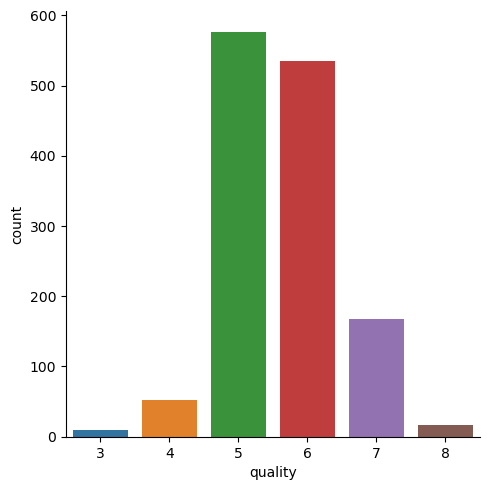

In [9]:
sns.catplot(x='quality',data=wine_data,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

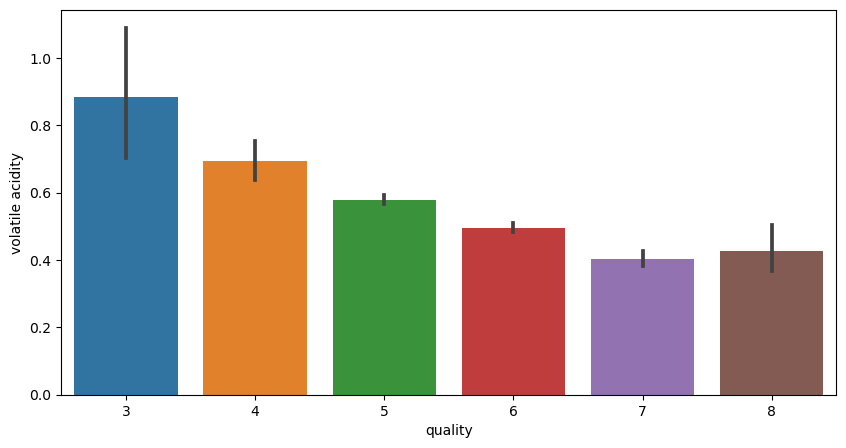

In [10]:
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: >

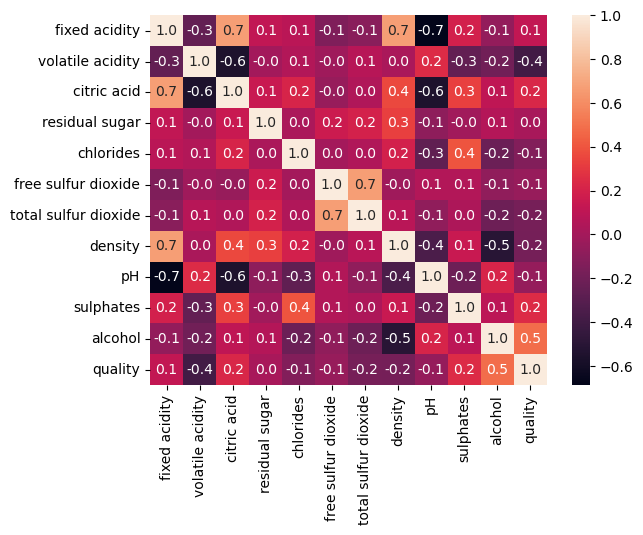

In [11]:
sns.heatmap(wine_data.corr(),cbar=True,fmt='.1f',annot=True)

In [12]:
X = wine_data.drop(columns='quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Binarization

In [13]:
binarization = lambda y_value:1 if y_value >=7 else 0
Y = wine_data['quality'].apply(binarization)

print(Y)

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [15]:
print(Y_train.shape)

(1087,)


In [16]:
model = RandomForestClassifier()

In [17]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [18]:
X_train_prediction = model.predict(X_train)
X_train_prediction_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"The accuracy of your training model is {X_train_prediction_accuracy*100}")


X_test_prediction = model.predict(X_test)
X_test_prediction_accuracy = accuracy_score(X_test_prediction,Y_test)
print(f"The accuracy of your testing model is {X_test_prediction_accuracy*100}")

The accuracy of your training model is 100.0
The accuracy of your testing model is 87.86764705882352


In [19]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
prediction = model.predict(input_data)
print(prediction)

if prediction[0]==1:
    print('quality wine')
else:
    print('less quality wine')

[0]
less quality wine


C:\Users\abang\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
import pickle
with open('model1.pkl','wb') as file:
    pickle.dump('model1.pkl',file)
    
with open('model1.pkl','rb') as file:
    pickle.load(file)